In [ ]:
!pip install interpret==0.2.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 64.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 22.7 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=d

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import shap
import joblib

In [ ]:
df = pd.read_csv('/content/loan_prediction_dataset.csv')

In [ ]:
print(df.head())

   Age  Income  Credit_Score  Loan_Amount  Loan_Term Employment_Status  \
0   56   81788           334        15022         48          Employed   
1   69  102879           781        21013         24     Self-Employed   
2   46   58827           779        39687         60     Self-Employed   
3   32  127188           364        16886         24        Unemployed   
4   60   25655           307        26256         36        Unemployed   

   Loan_Approved  
0              0  
1              1  
2              0  
3              0  
4              0  


In [ ]:
df.isnull().sum()

,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Employment_Status,0
Loan_Approved,0


In [ ]:
df.describe()


,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Loan_Approved
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,43.805500,84533.585000,577.055000,25460.315000,35.47800,0.171000
std,14.929203,37771.169751,157.525951,14116.737774,16.98587,0.376603
min,18.000000,20155.000000,300.000000,1060.000000,12.00000,0.000000
25%,31.000000,50925.250000,440.000000,13444.250000,24.00000,0.000000
50%,44.000000,84073.500000,578.500000,25446.000000,36.00000,0.000000
75%,56.000000,117523.250000,715.250000,37949.250000,48.00000,0.000000
max,69.000000,149992.000000,849.000000,49994.000000,60.00000,1.000000


In [ ]:
df.shape

(2000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              2000 non-null   int64
 1   Income                           2000 non-null   int64
 2   Credit_Score                     2000 non-null   int64
 3   Loan_Amount                      2000 non-null   int64
 4   Loan_Term                        2000 non-null   int64
 5   Loan_Approved                    2000 non-null   int64
 6   Employment_Status_Self-Employed  2000 non-null   bool 
 7   Employment_Status_Unemployed     2000 non-null   bool 
dtypes: bool(2), int64(6)
memory usage: 97.8 KB


In [ ]:
df["Employment_Status"].unique()

KeyError: 'Employment_Status'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['Employment_Status'], drop_first=True)

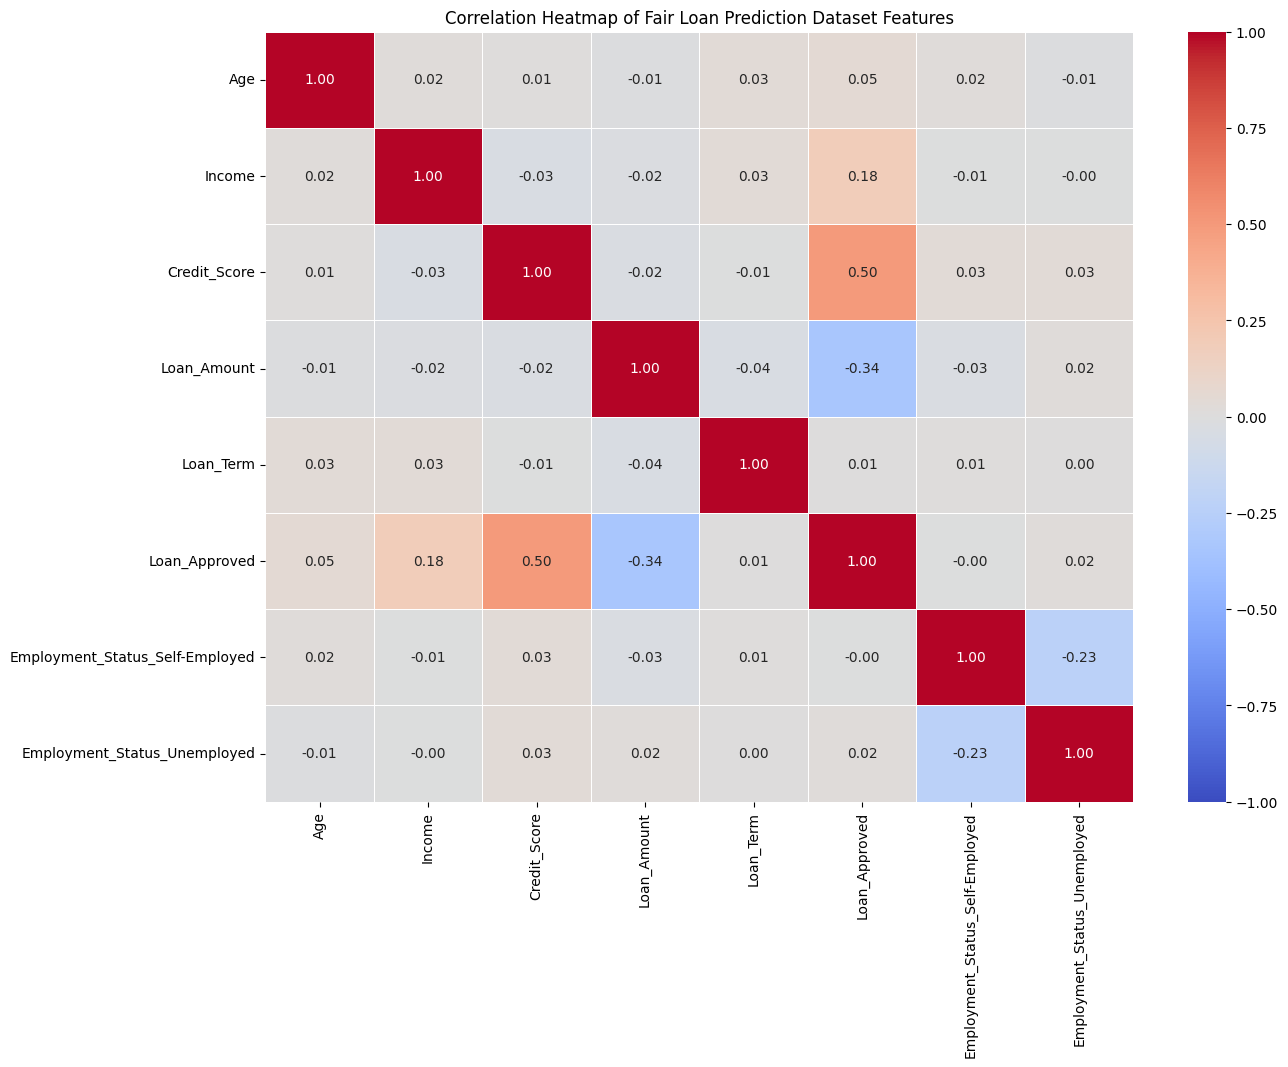

In [ ]:
correlation_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Fair Loan Prediction Dataset Features')
plt.savefig('correlation_heatmap_loan.png')
plt.show()

In [ ]:
numerical_cols = ['Income','Credit_Score','Loan_Amount','Loan_Term','Loan_Approved']

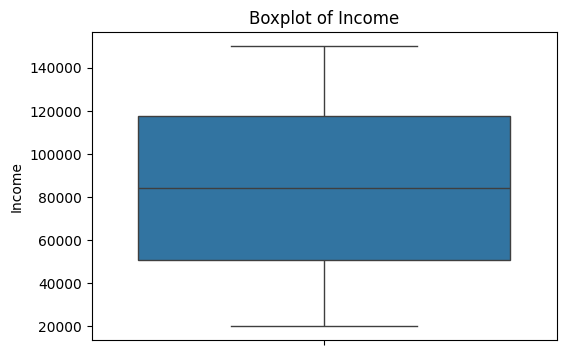

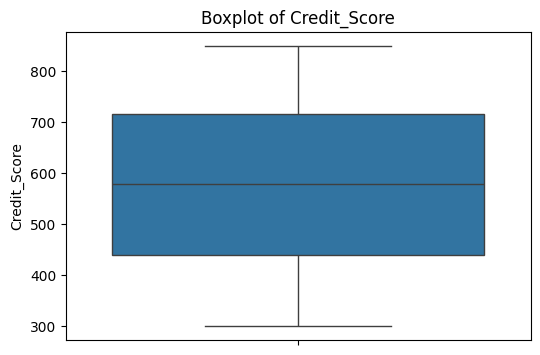

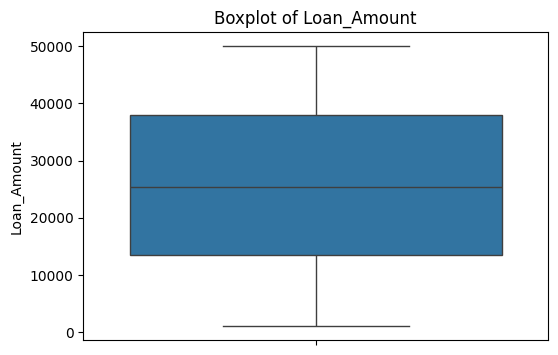

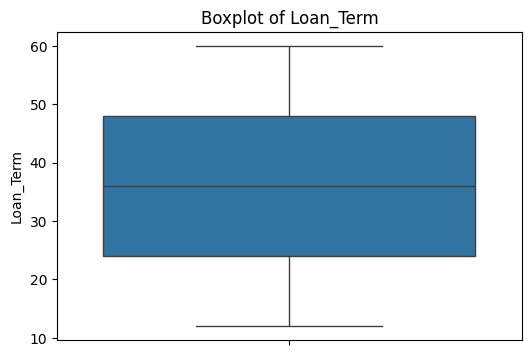

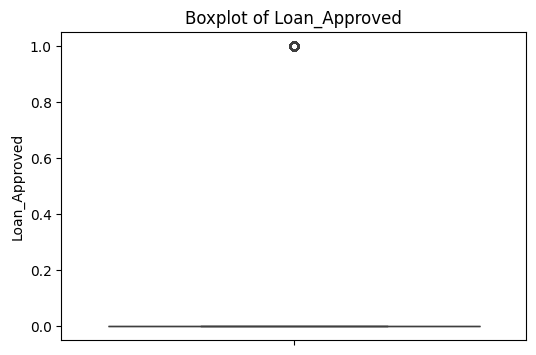

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('')  # remove x-label for cleaner look
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_sample = X_train.head(100)
X_train_sample.to_csv('X_train_sample.csv', index=False)
y_train_sample = y_train.head(100)
y_train_sample.to_csv('y_train_sample.csv', index=False)

In [ ]:
def train_ebm(X_train, y_train):
    ebm = ExplainableBoostingClassifier(
        feature_names=X.columns.tolist(),
        interactions=10,  # Allow for some feature interactions
        random_state=42
    )
    ebm.fit(X_train, y_train)
    return ebm

In [ ]:
ebm = train_ebm(X_train, y_train)

In [ ]:
y_pred = ebm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9975

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      0.99        68

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [ ]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Results:
Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      0.99        68

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [ ]:
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Results:
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       332
           1       0.00      0.00      0.00        68

    accuracy                           0.83       400
   macro avg       0.41      0.50      0.45       400
weighted avg       0.69      0.83      0.75       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


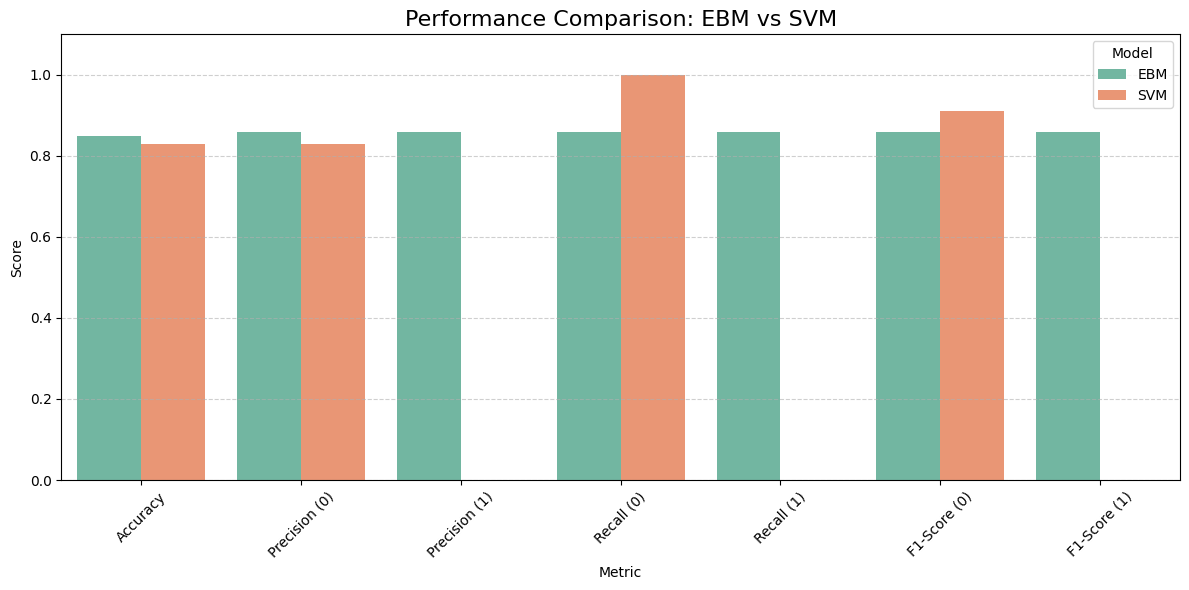

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define performance metrics
metrics = ['Accuracy', 'Precision (0)', 'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1-Score (0)', 'F1-Score (1)']
ebm_scores = [0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
svm_scores = [0.83, 0.83, 0.00, 1.00, 0.00, 0.91, 0.00]

# Create dataframe for plotting
df = pd.DataFrame({
    'Metric': metrics,
    'EBM': ebm_scores,
    'SVM': svm_scores
})

# Melt dataframe to long format for seaborn
df_melted = df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='Set2')

plt.title('Performance Comparison: EBM vs SVM', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("\nXGBoost Results:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00        68

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("EBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

EBM Results:
Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      0.99        68

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc:.3f}")


ROC-AUC Score: 0.993


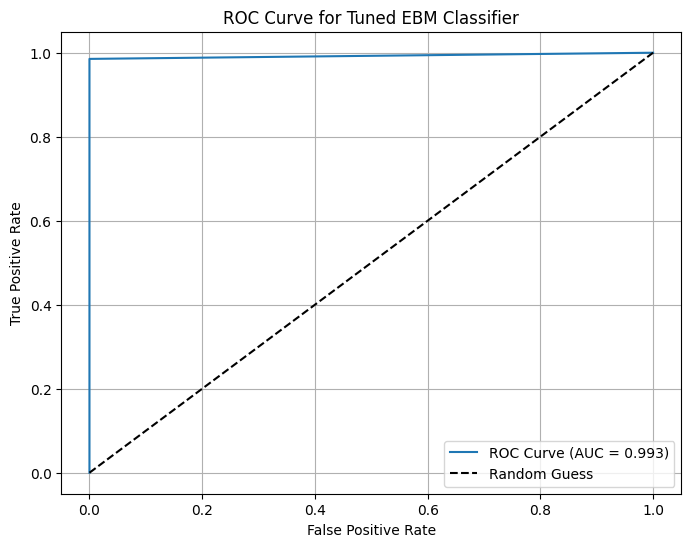

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned EBM Classifier')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_loan_pred.png')
plt.show()

In [ ]:
def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


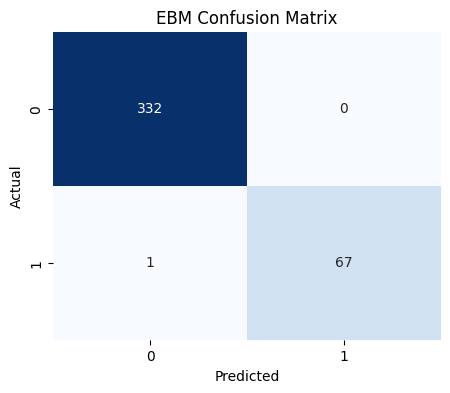

'\n# Plot for Random Forest\nplot_confusion("Random Forest", y_test, rf_preds)\n\n\n# Plot for SVM\nplot_confusion("SVM", y_test, svm_preds)\n\n# Plot for XGBoost\nplot_confusion("XGBoost", y_test, xgb_preds)\n'

In [ ]:
# Plot for EBM
plot_confusion("EBM", y_test, y_pred)
'''
# Plot for Random Forest
plot_confusion("Random Forest", y_test, rf_preds)


# Plot for SVM
plot_confusion("SVM", y_test, svm_preds)

# Plot for XGBoost
plot_confusion("XGBoost", y_test, xgb_preds)
'''

In [ ]:
import shap
import numpy as np

def perform_shap_analysis(model, X_train, X_test):
    # Convert boolean columns to integers (0 or 1) for SHAP compatibility
    # Use .copy() to avoid modifying the original DataFrames outside this function
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    for col in X_train_processed.select_dtypes(include='bool').columns:
        try:
            X_train_processed[col] = X_train_processed[col].astype(int)
        except Exception as e:
            print(f"Could not convert column {col} in X_train to int: {e}")

    for col in X_test_processed.select_dtypes(include='bool').columns:
        try:
            X_test_processed[col] = X_test_processed[col].astype(int)
        except Exception as e:
            print(f"Could not convert column {col} in X_test to int: {e}")

    # Create explainer
    # Use the processed dataframes
    explainer = shap.Explainer(model.predict_proba, X_train_processed)
    shap_values = explainer(X_test_processed)
    return explainer, shap_values

explainer, shap_values = perform_shap_analysis(ebm, X_train, X_test)

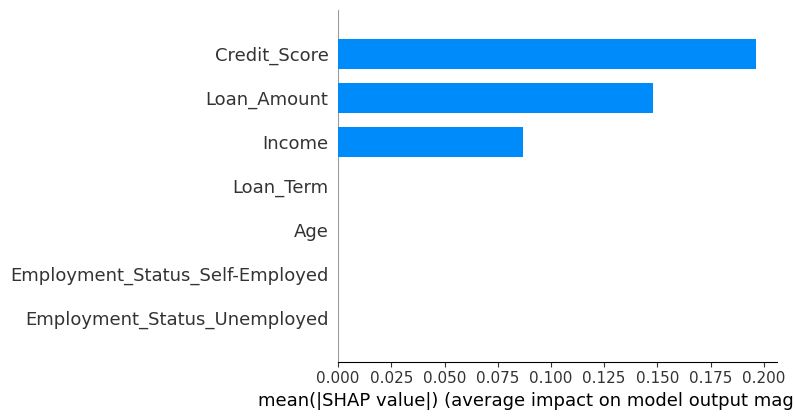

In [ ]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X.columns, plot_type="bar", show=False)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


Features used by EBM model: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']
X_test columns: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


PermutationExplainer explainer: 201it [00:12,  4.10it/s]
/tmp/ipython-input-35-2641344958.py:84: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_array, X_test, feature_names=model_features)


SHAP values shape: (200, 20)
Base value for positive class: 0.6598

SHAP Explanations for First 5 Instances:
   Instance  Predicted Class Predicted Probability  checking_status  duration  \
0         0                1                 0.620        -0.124527  0.012588   
1         1                1                 0.584        -0.129231  0.002776   
2         2                0                 0.359        -0.150057 -0.017043   
3         3                1                 0.693         0.087993  0.052054   
4         4                1                 0.886         0.146785 -0.047987   

   credit_history   purpose  credit_amount  savings_status  employment  ...  \
0        0.005017  0.042827       0.061807       -0.028965    0.000731  ...   
1        0.001796 -0.045565      -0.002616       -0.000946   -0.004205  ...   
2       -0.187851 -0.049261       0.049272        0.006079    0.025938  ...   
3        0.010674  0.046223      -0.057066       -0.021973    0.000075  ...   
4        

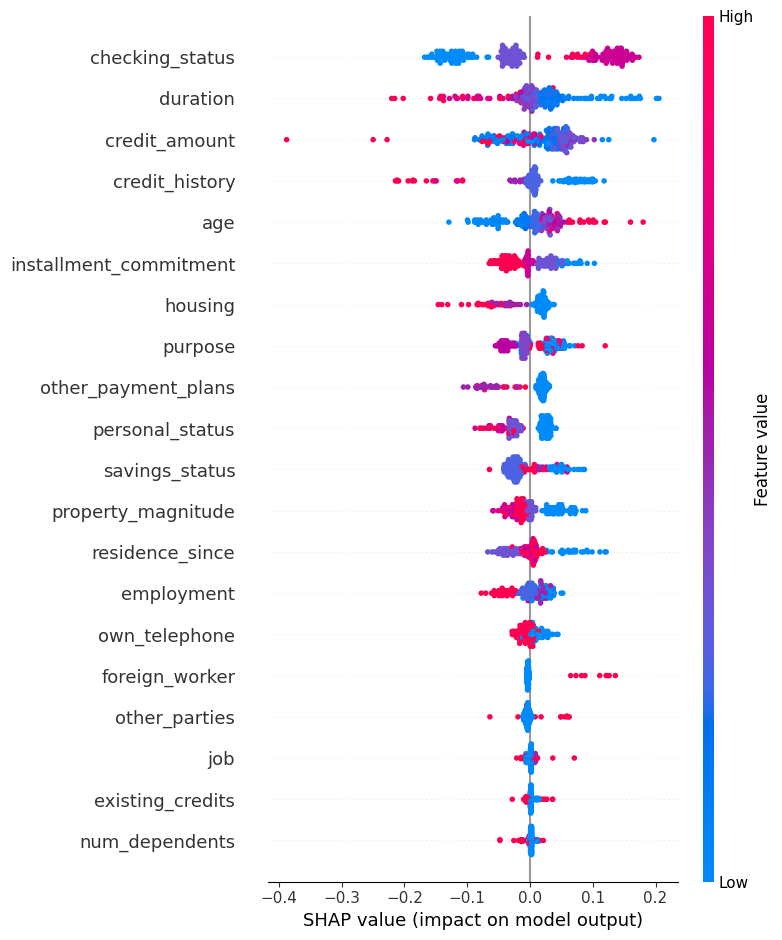


Force plot for first instance (Predicted: 1, Prob: 0.620)


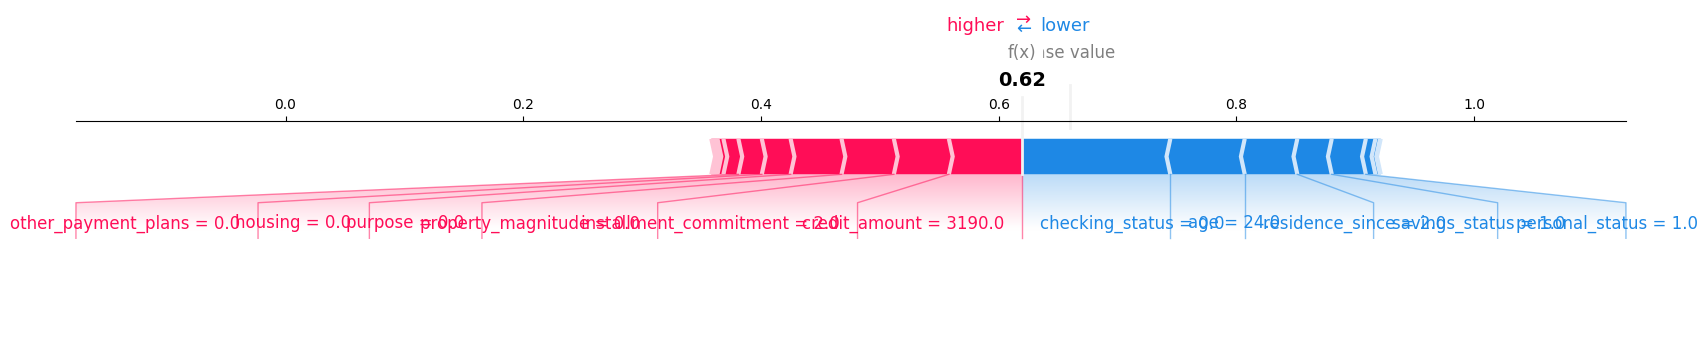


Saved all explanations to 'ebm_shap_explanations.csv'

Top 5 Most Important Features:
            Feature  SHAP Importance
0   checking_status         0.097064
1          duration         0.047809
4     credit_amount         0.046360
2    credit_history         0.040712
12              age         0.037546


In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import accuracy_score

# Install compatible versions if needed (uncomment for Google Colab)
# !pip install numpy==1.21.0 interpret==0.2.7 shap==0.40.0

# Load your dataset - replace this with your actual data loading code
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# Example with German Credit Dataset if you don't have your data ready
from sklearn.datasets import fetch_openml
credit = fetch_openml('credit-g', as_frame=True)
X = credit.frame.drop('class', axis=1)
y = (credit.frame['class'] == 'good').astype(int)

# Convert categoricals (simple preprocessing)
cat_cols = X.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    X[col] = pd.factorize(X[col])[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train EBM model
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Step 1: Verify Features
try:
    model_features = ebm.feature_names_in_
except AttributeError:
    model_features = X_train.columns.tolist()

print("Features used by EBM model:", model_features)
print("X_test columns:", X_test.columns.tolist())

# Ensure feature alignment
X_test = X_test[model_features]

# Step 2: Compute SHAP Values
explainer = shap.Explainer(ebm.predict_proba, X_train)
shap_values = explainer(X_test)

# For binary classification, we focus on class 1 (positive class)
shap_values_array = shap_values.values[:, :, 1]
base_value = shap_values.base_values[:, 1].mean()

print(f"SHAP values shape: {shap_values_array.shape}")
print(f"Base value for positive class: {base_value:.4f}")

# Step 3: Get Predictions
predictions = ebm.predict(X_test)
probabilities = ebm.predict_proba(X_test)[:, 1]

# Step 4: Generate Explanations (first 5 instances)
n_display = 5
explanations = []

for i in range(min(n_display, len(X_test))):
    explanation = {
        'Instance': i,
        'Predicted Class': predictions[i],
        'Predicted Probability': f"{probabilities[i]:.3f}"
    }
    for feature, shap_val in zip(model_features, shap_values_array[i]):
        explanation[feature] = shap_val
    explanations.append(explanation)

explanation_df = pd.DataFrame(explanations)
print("\nSHAP Explanations for First 5 Instances:")
print(explanation_df)

# Step 5: Visualizations
print("\nGenerating SHAP plots...")

# Summary plot
shap.summary_plot(shap_values_array, X_test, feature_names=model_features)

# Force plot for first instance
shap.initjs()
print(f"\nForce plot for first instance (Predicted: {predictions[0]}, Prob: {probabilities[0]:.3f})")
shap.force_plot(
    base_value,
    shap_values_array[0],
    X_test.iloc[0],
    feature_names=model_features,
    matplotlib=True
)
plt.show()

# Step 6: Save all explanations
all_explanations = []
for i in range(len(X_test)):
    record = {
        'Instance': i,
        'Predicted Class': predictions[i],
        'Predicted Probability': probabilities[i]
    }
    record.update(dict(zip(model_features, shap_values_array[i])))
    all_explanations.append(record)

pd.DataFrame(all_explanations).to_csv('ebm_shap_explanations.csv', index=False)
print("\nSaved all explanations to 'ebm_shap_explanations.csv'")

# Step 7: Feature Importance
mean_shap = np.abs(shap_values_array).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': model_features,
    'SHAP Importance': mean_shap
}).sort_values('SHAP Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# Additional: EBM's native feature importances
# print("\nEBM's Native Feature Importances:")
# for feat, imp in zip(model_features, ebm.feature_importances_):
#     print(f"{feat}: {imp:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'interactions': 0, 'learning_rate': 0.01, 'max_bins': 128, 'max_interaction_bins': 16, 'max_leaves': 5, 'min_samples_leaf': 5}
Best ROC-AUC Score from GridSearch: 0.7747632836918552

EBM - Classification Report:
              precision    recall  f1-score   support

Not Approved       0.70      0.32      0.44        59
    Approved       0.77      0.94      0.85       141

    accuracy                           0.76       200
   macro avg       0.74      0.63      0.64       200
weighted avg       0.75      0.76      0.73       200

EBM - ROC-AUC Score: 0.824


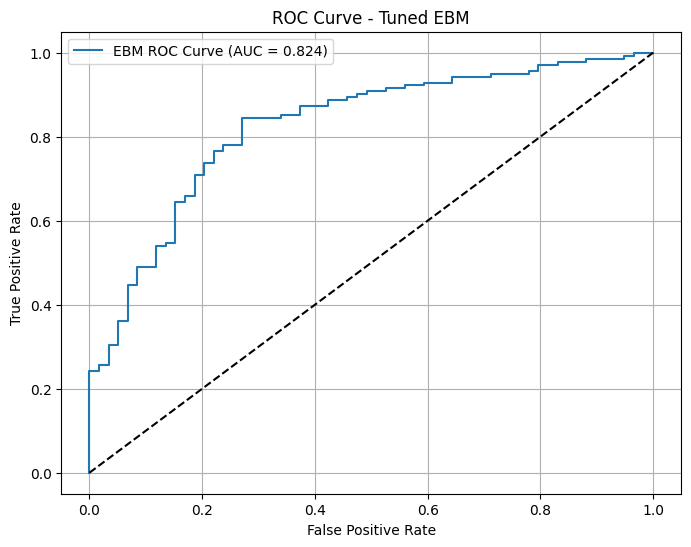

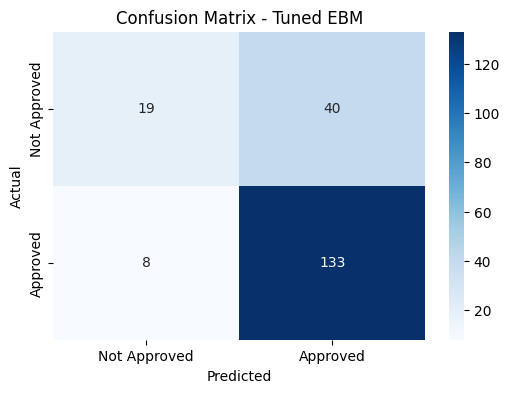

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for EBM
param_grid = {
    'max_bins': [128, 256],
    'max_interaction_bins': [16, 32],
    'interactions': [0, 10],
    'learning_rate': [0.01, 0.05],
    'min_samples_leaf': [2, 5],
    'max_leaves': [3, 5]
}

# Initialize EBM model
ebm_model = ExplainableBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm_model, param_grid=param_grid,
                                cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)
grid_search_ebm.fit(X_train, y_train)

# Best EBM model
best_ebm_model = grid_search_ebm.best_estimator_
print("Best Parameters:", grid_search_ebm.best_params_)
print("Best ROC-AUC Score from GridSearch:", grid_search_ebm.best_score_)

# Predictions
y_pred_ebm = best_ebm_model.predict(X_test)
y_prob_ebm = best_ebm_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nEBM - Classification Report:")
print(classification_report(y_test, y_pred_ebm, target_names=['Not Approved', 'Approved']))
print(f"EBM - ROC-AUC Score: {roc_auc_score(y_test, y_prob_ebm):.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_ebm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'EBM ROC Curve (AUC = {roc_auc_score(y_test, y_prob_ebm):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned EBM')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_ebm_tuned.png')
plt.show()

# Confusion Matrix
cm_ebm = confusion_matrix(y_test, y_pred_ebm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ebm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned EBM')
plt.savefig('confusion_matrix_ebm_tuned.png')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(best_ebm_model, 'best_ebm_model.joblib')
print("Model saved as 'best_ebm_model.joblib'")

Model saved as 'best_ebm_model.joblib'


In [ ]:
X_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,0,18,1,0,3190,1,1,2,1,0,2,0,24,0,0,1,0,1,1,0
737,0,18,1,3,4380,4,1,3,0,0,4,3,35,0,0,1,1,2,0,0
740,0,24,4,3,2325,4,2,2,0,0,3,3,32,1,0,1,0,1,1,0
660,3,12,1,0,1297,1,1,3,3,0,4,0,23,0,2,1,0,1,1,0
411,2,33,0,4,7253,1,2,3,0,0,2,3,35,0,0,2,2,1,0,0


In [ ]:
y_test.head()

,class
521,0
737,1
740,1
660,1
411,1


In [ ]:
import pandas as pd
import json
import joblib  # For saving the model

# --- 1. Preprocessing (if needed) ---
# Example: convert categorical to numeric if not already done
# X_train['Gender'] = X_train['Gender'].map({'Male': 1.0, 'Female': 0.0})
# X_train['HasCrCard'] = X_train['HasCrCard'].astype(float)
# X_train['IsActiveMember'] = X_train['IsActiveMember'].astype(float)
# X_train['Geography_Germany'] = X_train['Geography_Germany'].astype(float)
# X_train['Geography_Spain'] = X_train['Geography_Spain'].astype(float)

# --- 2. Save a small sample of training data ---
X_train_sample = X_train.head(500)
X_train_sample.to_csv('X_train_sample.csv', index=False)

# --- 3. Save model metadata ---
model_info = {
    'model_params': best_ebm_model.get_params(),
    'feature_names': list(X_train.columns),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'test_roc_auc': float(roc_auc_score(y_test, y_prob_ebm))
}

with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

# --- 4. Save EBM model ---
joblib.dump(best_ebm_model, 'best_ebm_model.pkl')

# --- 5. Print summary ---
print(f"\nModel Performance Summary:")
print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_prob_ebm):.4f}")
print(f"Model type: {type(best_ebm_model).__name__}")
print(f"Number of features: {len(X_train.columns)}")

print(f"\nFiles saved:")
print(f"- best_ebm_model.pkl")
print(f"- X_train_sample.csv")
print(f"- model_info.json")
print(f"- roc_curve_ebm_tuned.png")
print(f"- confusion_matrix_ebm_tuned.png")


Model Performance Summary:
Test ROC-AUC Score: 0.8244
Model type: ExplainableBoostingClassifier
Number of features: 20

Files saved:
- best_ebm_model.pkl
- X_train_sample.csv
- model_info.json
- roc_curve_ebm_tuned.png
- confusion_matrix_ebm_tuned.png


In [ ]:
print(X_train.columns)  # should show all 20 column names

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')
